In [1]:
# Imports for file and from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import gaussian_kde

In [2]:
#Reading, Splitting, and Setting data

data = pd.read_csv(r'Volumetric_features.csv')

X = data.iloc[0:1221,1:139] # X = prediction values
y = data.iloc[0:1221,139] # y = target values

#splits 25% data to test set
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 42)

# PCA Scaling
sc = StandardScaler()
X1 = sc.fit_transform(X) #scales data
pca1 = PCA(n_components = 100)
pca1_data = pca1.fit_transform(X1) #fits training data to rest

sc = StandardScaler()
xTrain = sc.fit_transform(xTrain) #fits training data to rest
xTest = sc.transform(xTest) #scales data

R^2 score: 0.5323418660089911
Mean Squared Error: 10.88399610115058
Mean Absolute Percentage Error: 0.03202445314297302


C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


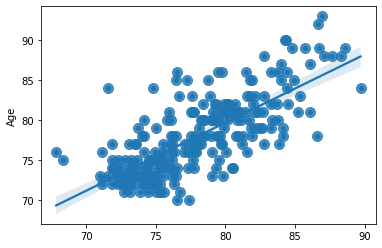

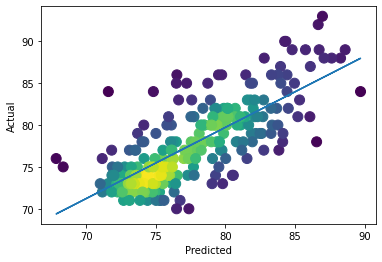

In [3]:
# Linear Support Vector Machine Algorithm

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
svm = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-3))
svm.fit(xTrain, yTrain)
yPred1 = svm.predict(xTest)

# Print Results
print ("R^2 score:", r2_score(yTest, yPred1))
print("Mean Squared Error:", mean_squared_error(yTest, yPred1))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(yTest, yPred1))

# Print Scatter Plots
sns.scatterplot(yPred1, yTest)
sns.regplot(yPred1 ,yTest, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([yPred1,yTest])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(yPred1,yTest, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
a, b = np.polyfit(yPred1, yTest, 1)
plt.plot(yPred1, a*yPred1+b)  
plt.show()

R^2 score: 0.6105788125046806
Mean Squared Error: 9.063156135515806
Mean Absolute Percentage Error: 0.030633554756820964


C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


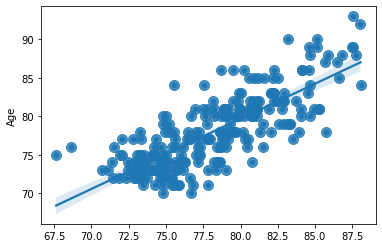

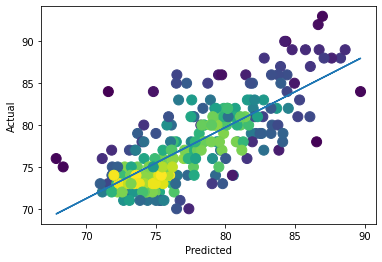

In [4]:
# Stochastic Gradient Descent Algorithm

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd.fit(xTrain, yTrain)
yPred2 = sgd.predict(xTest)

# Print Results
print ("R^2 score:", r2_score(yTest, yPred2))
print("Mean Squared Error:", mean_squared_error(yTest, yPred2))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(yTest, yPred2))

# Print Scatter Plots
sns.scatterplot(yPred2, yTest)
sns.regplot(yPred2 ,yTest, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([yPred2,yTest])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(yPred1,yTest, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
c, d = np.polyfit(yPred1, yTest, 1)
plt.plot(yPred1, c*yPred1+d) 
plt.show()

R^2 score: 0.555657043878693
Mean Squared Error: 10.341372576427823
Mean Absolute Percentage Error: 0.03241889670553171


C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


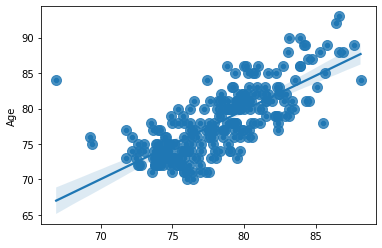

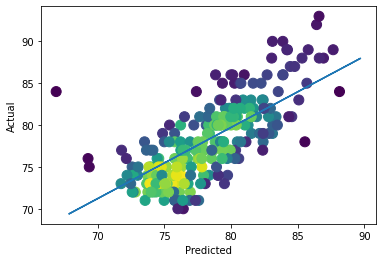

In [5]:
# Gaussian Process Regressor Algorithm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(xTrain, yTrain)
yPred3 = gpr.predict(xTest)

# Print Results
print ("R^2 score:", r2_score(yTest, yPred3))
print("Mean Squared Error:", mean_squared_error(yTest, yPred3))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(yTest, yPred3))

# Print Scatter Plots
sns.scatterplot(yPred3, yTest)
sns.regplot(yPred3 ,yTest, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([yPred1,yTest])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(yPred3,yTest, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
e, f = np.polyfit(yPred1, yTest, 1)
plt.plot(yPred1, e*yPred1+f) 
plt.show()